# Looking at which countries have been mentioned 

(and when) 

in the Elysée Agenda

In [36]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%%R
# install.packages("ggridges")
require('tidyverse')
library(ggridges)
library(ggplot2)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
df = pd.read_csv('./data/elysee.csv')

In [7]:
# this is a list of all countries written in French that I got chatgpt to write 

pays = [
    'Afghanistan',
    'Afrique du Sud',
    'Albanie',
    'Algérie',
    'Allemagne',
    'Andorre',
    'Angola',
    'Antigua-et-Barbuda',
    'Arabie Saoudite',
    'Argentine',
    'Arménie',
    'Australie',
    'Autriche',
    'Azerbaïdjan',
    'Bahamas',
    'Bahreïn',
    'Bangladesh',
    'Barbade',
    'Bélarus',
    'Belgique',
    'Belize',
    'Bénin',
    'Bhoutan',
    'Bolivie',
    'Bosnie-Herzégovine',
    'Botswana',
    'Brésil',
    'Brunei',
    'Bulgarie',
    'Burkina Faso',
    'Burundi',
    'Cambodge',
    'Cameroun',
    'Canada',
    'Cap-Vert',
    'République centrafricaine',
    'Chili',
    'Chine',
    'Chypre',
    'Colombie',
    'Comores',
    'République du Congo',
    'République démocratique du Congo',
    'Corée du Nord',
    'Corée du Sud',
    'Costa Rica',
    "Côte d'Ivoire",
    'Croatie',
    'Cuba',
    'Danemark',
    'Djibouti',
    'République dominicaine',
    'Dominique',
    'Égypte',
    'Émirats arabes unis',
    'Équateur',
    'Érythrée',
    'Espagne',
    'Estonie',
    'États-Unis',
    'Éthiopie',
    'Fidji',
    'Finlande',
    'France',
    'Gabon',
    'Gambie',
    'Géorgie',
    'Ghana',
    'Grèce',
    'Grenade',
    'Guatemala',
    'Guinée',
    'Guinée-Bissau',
    'Guinée équatoriale',
    'Guyana',
    'Haïti',
    'Honduras',
    'Hongrie',
    'Îles Marshall',
    'Îles Salomon',
    'Inde',
    'Indonésie',
    'Iran',
    'Iraq',
    'Irlande',
    'Islande',
    'Israël',
    'Italie',
    'Jamaïque',
    'Japon',
    'Jordanie',
    'Kazakhstan',
    'Kenya',
    'Kirghizistan',
    'Kiribati',
    'Koweït',
    'Laos',
    'Lesotho',
    'Lettonie',
    'Liban',
    'Libéria',
    'Libye',
    'Liechtenstein',
    'Lituanie',
    'Luxembourg',
    'Macédoine',
    'Madagascar',
    'Malaisie',
    'Malawi',
    'Maldives',
    'Mali',
    'Malte',
    'Maroc',
    'Maurice',
    'Mauritanie',
    'Mexique',
    'Micronésie',
    'Moldavie',
    'Monaco',
    'Mongolie',
    'Monténégro',
    "Mozambique",
    "Namibie",
    "Nauru",
    "Népal",
    "Nicaragua",
    "Niger",
    "Nigeria",
    "Niue",
    "Norvège",
    "Nouvelle-Zélande",
    "Oman",
    "Ouganda",
    "Ouzbékistan",
    "Pakistan",
    "Palaos",
    "Palestine",
    "Panama",
    "Papouasie-Nouvelle-Guinée",
    "Paraguay",
    "Pays-Bas",
    "Pérou",
    "Philippines",
    "Pologne",
    "Portugal",
    "Qatar",
    "Roumanie",
    "Royaume-Uni",
    "Russie",
    "Rwanda",
    "Saint-Christophe-et-Niévès",
    "Saint-Marin",
    "Saint-Vincent-et-les Grenadines",
    "Sainte-Lucie",
    "Salvador",
    "Samoa",
    "São Tomé-et-Principe",
    "Sénégal",
    "Serbie",
    "Seychelles",
    "Sierra Leone",
    "Singapour",
    "Slovaquie",
    "Slovénie",
    "Somalie",
    "Soudan",
    "Soudan du Sud",
    "Sri Lanka",
    "Suède",
    "Suisse",
    "Suriname",
    "Swaziland",
    "Syrie",
    "Tadjikistan",
    "Tanzanie",
    "Tchad",
    "République tchèque",
    "Thaïlande",
    "Timor oriental",
    "Togo",
    "Tonga",
    "Trinité-et-Tobago",
    "Tunisie",
    "Turkménistan",
    "Turquie",
    "Tuvalu",
    "Ukraine",
    "Uruguay",
    "Vanuatu",
    "Vatican",
    "Venezuela",
    "Viêt Nam",
    "Yémen",
    "Zambie",
    "Zimbabwe"
]


In [8]:
# this takes any mention of a country in the description and adds it to a list in a new column called "pays"

df['pays'] = df['desc'].apply(lambda x: [item for item in pays if item in x])

# let me see how that worked 
df.to_csv('./data/elysee_test.csv', index=False)

In [9]:
# fixing some other things

df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)
df['month_year'] = df['month'] + df['year']

In [1092]:
df

,date,month,time,desc,type,year,names,pays,month_year
0,2017-05-14,5,10h00,Passation de pouvoir et cérémonie d'investiture,NaN,2017,NaN,[],52017
1,2017-05-14,5,12h00,Cérémonie à l'hôtel de Ville de Paris,NaN,2017,NaN,[],52017
2,2017-05-17,5,20h00,"Dîner avec M. Donald Tusk, Président du Consei...",NaN,2017,NaN,[],52017
3,2017-05-18,5,11h00,Conseil des ministres,NaN,2017,NaN,[],52017
4,2017-05-18,5,14h30,Conseil de défense,NaN,2017,NaN,[],52017
...,...,...,...,...,...,...,...,...,...
3738,2023-03-28,3,14h00,Réunion avec les industriels de l’armement.,Réunion,2023,NaN,[],32023
3739,2023-03-28,3,20h00,Dîner de travail avec des experts en vue du So...,Dîner,2023,NaN,[],32023
3740,2023-03-29,3,09h00,Petit-déjeuner de travail avec des représentan...,Rencontre,2023,NaN,[],32023
3741,2023-03-30,3,Toute la journée,Déplacement dans les Hautes-Alpes à l’occasion...,Déplacement,2023,NaN,[],32023


In [16]:
df_pays = df

df_pays = df_pays[['pays', 'month_year']]

df_pays

,pays,month_year
0,[],52017
1,[],52017
2,[],52017
3,[],52017
4,[],52017
...,...,...
3747,[],42023
3748,[Chine],42023
3749,[Chine],42023
3750,[Chine],42023


In [19]:
# this goes through the pays column and make each item in the list a row, where there are multiple

df_pays = df_pays.explode('pays')

# this means I have a row for each mention with the month and year during which it was mentioned

In [20]:
# it looks like this
df_pays

,pays,month_year
0,NaN,52017
1,NaN,52017
2,NaN,52017
3,NaN,52017
4,NaN,52017
...,...,...
3747,NaN,42023
3748,Chine,42023
3749,Chine,42023
3750,Chine,42023


In [21]:
# but let's get rid of the NaNs
df_pays = df_pays.dropna()

In [22]:
df_pays

# (much better)

,pays,month_year
18,Belgique,52017
19,Italie,52017
20,Italie,52017
23,Russie,52017
29,France,52017
...,...,...
3743,Ukraine,42023
3748,Chine,42023
3749,Chine,42023
3750,Chine,42023


In [24]:
df_pays['pays'].value_counts().head(11)

France         155
Allemagne       77
Ukraine         43
Royaume-Uni     29
Russie          28
Chine           22
Arménie         17
Italie          16
Israël          16
Japon           16
Espagne         13
Name: pays, dtype: int64

In [28]:
# keeping the top countries except France

df_pays = df_pays[df_pays['pays'].isin(['Allemagne', 'Ukraine', 'Royaume-Uni', 'Russie', 'Chine', 'Arménie', 'Italie', 'Israël', 'Japon'])]

In [30]:
# group by country and year and count the number of times each country appears in each year

df_pays = df_pays.groupby(['pays', 'month_year']).size().reset_index(name='count')

In [31]:
# make month_year a datetime object

df_pays['month_year'] = pd.to_datetime(df_pays['month_year'], format='%m%Y')


In [33]:
# we're going to make the ridge plot with this

df_pays.to_csv('./data/ridge.csv', index=False)

In [1101]:
#  just exploring a bit - making a pivot table

df_pays = df_pays.pivot(index='month_year', columns='pays', values='count')

# fill NaN values with 0

df_pays = df_pays.fillna(0)

df_pays

# make month_year the index

df_pays = df_pays.reset_index()

df_pays

pays,month_year,Allemagne,Arménie,Chine,Israël,Italie,Japon,Royaume-Uni,Russie,Ukraine
0,2017-05-01,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
1,2017-06-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2017-07-01,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,2017-08-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-10-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017-11-01,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2017-12-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,2018-01-01,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2018-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,2018-06-01,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [1102]:
# save df_pays as a csv

df_pays.to_csv('./testing_data/df_pays.csv', index=False)

In [1103]:
#open the csv

df_pays = pd.read_csv('./testing_data/df_pays.csv')

# df_pays = df_pays.transpose()


In [1106]:
df_pays

,month_year,Allemagne,Arménie,Chine,Israël,Italie,Japon,Royaume-Uni,Russie,Ukraine
0,2017-05-01,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
1,2017-06-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2017-07-01,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,2017-08-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-10-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017-11-01,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2017-12-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,2018-01-01,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2018-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,2018-06-01,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [1107]:
# save df_pays as a csv - for reference

df_pays.to_csv('./testing_data/df_pays.csv', index=False)

In [1108]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1109]:
%%R
# install.packages("ggridges")
require('tidyverse')
library(ggridges)
library(ggplot2)

In [43]:
%%R

df_pays <- read_csv('./data/ridge.csv')

Rows: 155 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): pays
dbl  (1): count
date (1): month_year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


R[write to console]: Picking joint bandwidth of 349



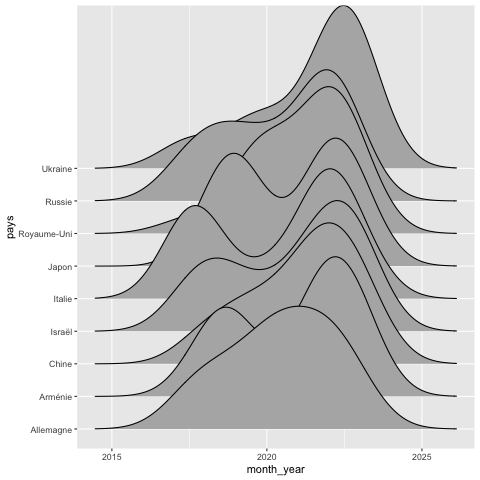

In [44]:
%%R

# make a ridge plot of the data

ggplot(df_pays, aes(x = month_year, y = pays)) +
  geom_density_ridges(scale = 5)

# save the plot as a png

# ggsave('./testing_data/ridge.png')

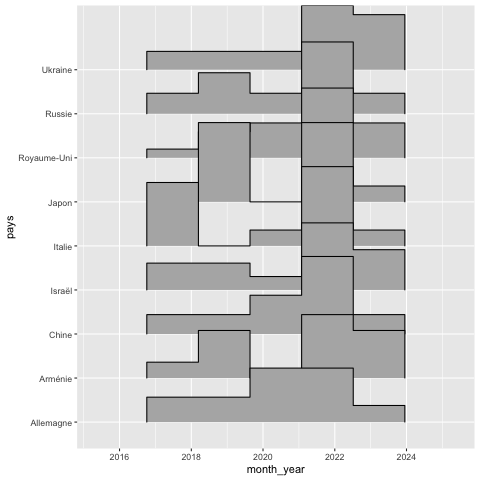

In [1113]:
%%R

ggplot(df_pays, aes(x = month_year, y = pays)) +
  geom_density_ridges(stat = "binline",
                      bins = 5, draw_baseline = FALSE)
 


In [1117]:
# alternative way of looking at the country counts 

country_counts = {}


for country in pays:
    country_mask = df['desc'].str.contains(country)
    if country_mask.any():
        country_counts[country] = country_mask.sum()

print(country_counts)


{'Afghanistan': 3, 'Afrique du Sud': 6, 'Albanie': 3, 'Algérie': 3, 'Allemagne': 77, 'Andorre': 9, 'Angola': 5, 'Arabie Saoudite': 3, 'Argentine': 4, 'Arménie': 17, 'Australie': 10, 'Autriche': 8, 'Azerbaïdjan': 9, 'Bahreïn': 2, 'Bangladesh': 2, 'Barbade': 1, 'Belgique': 7, 'Bénin': 5, 'Brésil': 2, 'Bulgarie': 7, 'Burkina Faso': 6, 'Cambodge': 1, 'Cameroun': 1, 'Canada': 9, 'République centrafricaine': 2, 'Chili': 1, 'Chine': 18, 'Chypre': 5, 'Colombie': 4, 'Comores': 3, 'République du Congo': 1, 'République démocratique du Congo': 3, "Côte d'Ivoire": 3, 'Croatie': 3, 'Danemark': 4, 'Djibouti': 3, 'Dominique': 6, 'Égypte': 3, 'Espagne': 13, 'Estonie': 7, 'États-Unis': 11, 'Finlande': 7, 'France': 155, 'Gabon': 3, 'Géorgie': 3, 'Ghana': 7, 'Grèce': 3, 'Guatemala': 1, 'Guinée': 5, 'Guinée-Bissau': 4, 'Haïti': 1, 'Hongrie': 4, 'Inde': 13, 'Indonésie': 3, 'Iran': 5, 'Irlande': 9, 'Islande': 1, 'Israël': 16, 'Italie': 16, 'Japon': 16, 'Jordanie': 9, 'Kazakhstan': 3, 'Kenya': 8, 'Koweït': 1,

In [1118]:
country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['count'])

country_counts_df.sort_values(by='count', ascending=False, inplace=True)

In [1120]:
# save the DataFrame to a CSV file

country_counts_df.to_csv('./testing_data/country_mentions.csv')
